<a href="https://colab.research.google.com/github/smnizza/machine_learning/blob/main/SL_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest – Gabungan Banyak Decision Tree untuk Meningkatkan Akurasi
Random Forest adalah metode **ensemble learning** yang menggunakan banyak **Decision Tree** untuk meningkatkan akurasi dan mengurangi overfitting.

## Cara Kerja Random Forest
1. **Membuat banyak Decision Tree** dari subset data yang berbeda.
2. **Setiap pohon menghasilkan prediksinya sendiri**.
3. **Menggabungkan hasil prediksi dengan voting mayoritas** (untuk klasifikasi) atau rata-rata (untuk regresi).

✅ **Kelebihan Random Forest**:
- Lebih stabil dan tidak mudah overfitting dibanding Decision Tree tunggal.
- Bisa digunakan untuk **klasifikasi dan regresi**.
- Dapat menangani **data dengan banyak fitur**.

❌ **Kekurangan Random Forest**:
- Lebih lambat dibanding Decision Tree karena ada banyak pohon yang harus dibuat.
- Sulit diinterpretasikan dibanding Decision Tree tunggal.

## Implementasi Random Forest
Kita akan menggunakan dataset yang sama seperti pada Decision Tree untuk memprediksi apakah seorang pelanggan akan membeli produk.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Contoh dataset: Usia dan Pendapatan vs Keputusan Membeli
data = {
    "Usia": [25, 30, 35, 40, 45, 20, 50, 60, 55, 23],
    "Pendapatan": [30, 50, 70, 90, 110, 20, 130, 140, 120, 25],
    "Membeli": [0, 0, 0, 1, 1, 0, 1, 1, 1, 0]  # 0 = Tidak Beli, 1 = Beli
}

df = pd.DataFrame(data)

# Split data menjadi fitur (X) dan target (y)
X = df[["Usia", "Pendapatan"]]
y = df["Membeli"]

# Pisahkan data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Random Forest dengan 10 pohon keputusan
model = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=42)
model.fit(X_train, y_train)

# Prediksi hasil
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.00

Confusion Matrix:
 [[1 0]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



## Analisis Pentingnya Fitur dalam Random Forest
Random Forest memungkinkan kita untuk melihat fitur mana yang paling berpengaruh terhadap keputusan akhir.

<ipython-input-2-62cec0ec51c5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


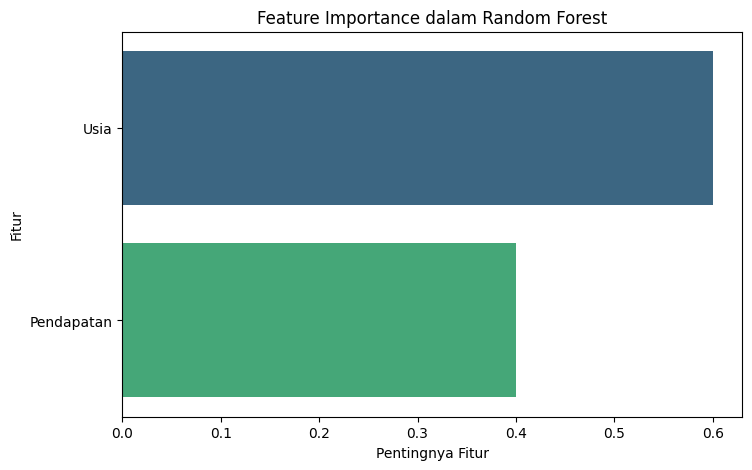

In [2]:
# Menampilkan pentingnya fitur
importances = model.feature_importances_
feature_names = X.columns

# Visualisasi dalam bentuk bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.xlabel("Pentingnya Fitur")
plt.ylabel("Fitur")
plt.title("Feature Importance dalam Random Forest")
plt.show()

## Kesimpulan
Random Forest adalah algoritma yang kuat untuk **klasifikasi dan regresi** karena:
- Mengurangi **overfitting** dibandingkan Decision Tree.
- Memberikan hasil lebih akurat karena menggunakan banyak pohon keputusan.

### **Pengembangan Lebih Lanjut**
- **Menyesuaikan jumlah pohon (n_estimators) untuk hasil lebih optimal.**
- **Menggunakan Random Forest untuk dataset lebih besar seperti prediksi kesehatan atau keuangan.**
- **Menggunakan GridSearchCV untuk mencari hyperparameter terbaik.**